In [47]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

In [48]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=33)

# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

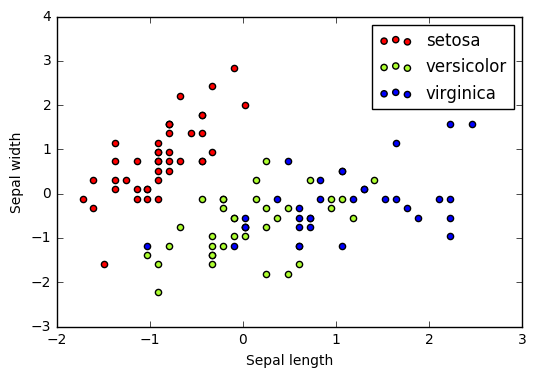

In [49]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']

#Plot data to see separation
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
    plt.legend(iris.target_names)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
#Setosa is better separated from the other two so we are best considering a binary system,
#comparing setosa or versicolor/virginica. 

In [50]:
#Import and set up the classifier built upon the training dataset
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

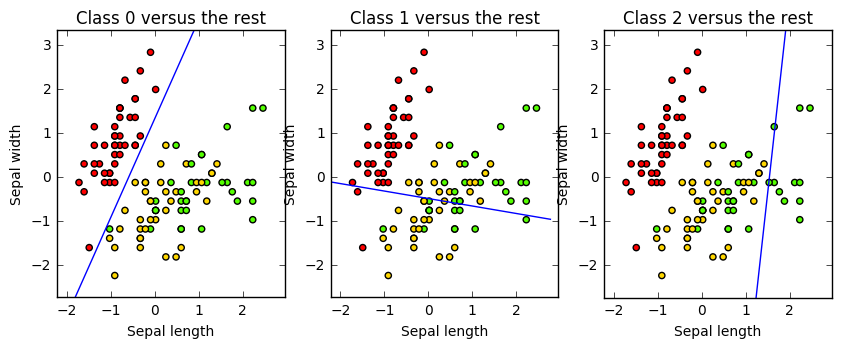

In [51]:
# A linear classification likes to separate classes by straight lines through the
# parameter space. Although we want to consider the binary system, we put all 3
# through the classifier and so we get 3 hyperplanes.
import numpy as np

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)   
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
    cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

In [55]:
# Run a new set of values through the classifier and print the answer.
# Also print the decision function used to guess what the new data suggests.
# Largest distance of the instance (data) from the hyperplane is considered
# most confident result

new = [[4.7, 3.1]]
print(clf.predict(scaler.transform(new)))
print(clf.decision_function(scaler.transform(new)))

[0]
[[ 21.72769573  -6.60520547 -30.69141451]]


In [61]:
#What makes a good classifier?
from sklearn import metrics
y_train_pred = clf.predict(X_train)
acc = metrics.accuracy_score(y_train, y_train_pred)
print(int(acc*100),'% accuracy of classifying training data')

82 % accuracy of classifying training data


In [65]:
# THIS IS A BAD WAY OF MEASURING ACCURACY!!
# You trained your classifier off this data and so it will in all likelihood perform well.
# This is why we held back 25% of the known data, we can test the classifier on data that
# it has never seen before.

y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(int(acc*100),'% accuracy of classifying test data\n')

# Print the classification report where accuracy of each class prediction is given by a variety of measures.
# The model does very well distinguishing setosa but suffers from picking from the other two.
print(metrics.classification_report(y_test, y_pred,target_names=iris.target_names))

# Finally the confusion matrix shows how many times class 'i' was predicted to be in class 'j'
# Good classifiers will accumulate the numbers along the diagonal
print(metrics.confusion_matrix(y_test, y_pred))

73 % accuracy of classifying test data

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.53      0.73      0.62        11
  virginica       0.80      0.63      0.71        19

avg / total       0.76      0.74      0.74        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0  7 12]]


In [88]:
# CROSS VALIDATION
# run a cross validation method on the training data to improve estimate
# on accuracy of our method

from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([('scaler', preprocessing.StandardScaler()),('linear_model', SGDClassifier())])

# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
for i in range(len(scores)): print(i+1,'- fold accuracy:',int(scores[i]*100),'%')
    
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(100*np.mean(scores), 100*sem(scores))
print(mean_score(scores))

1 - fold accuracy: 66 %
2 - fold accuracy: 73 %
3 - fold accuracy: 83 %
4 - fold accuracy: 66 %
5 - fold accuracy: 86 %
Mean score: 75.333 (+/-4.163)
